# **Visualization and EDA Handbook**

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import scipy.stats
from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

## **EDA on Gapminder Dataset**

#### **Import dataset**

In [201]:
gapminder = pd.read_csv("gapminder.csv")

#### **Minimum values in columns of gapminder dataset**

In [3]:
gapminder.min()

country             Afghanistan
year                       1800
region                   Africa
population                 2128
life_expectancy               4
age5_surviving           33.217
babies_per_woman           1.13
gdp_per_capita              142
gdp_per_day            0.388775
dtype: object

##### **Count of a country in gapminder dataset**

In [4]:
gapminder[gapminder['country'] == 'Afghanistan']['country'].count()

81

##### **Maximum value from the columns of gapminder dataset**

In [5]:
gapminder.max()

country                Zimbabwe
year                       2015
region                   Europe
population          1.37605e+09
life_expectancy            83.3
age5_surviving            99.81
babies_per_woman           9.22
gdp_per_capita           182668
gdp_per_day             500.118
dtype: object

##### **Count of a particular country in gapminder dataset**

In [6]:
gapminder[gapminder['country'] == 'Zimbabwe']['country'].count()

81

##### **Summary of gapminder dataset**

In [7]:
gapminder.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Columns: 9 entries, country to gdp_per_day
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


##### **Detail summary of gapminder dataset**

In [8]:
gapminder.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


##### **Descriptive statistics of gapminder dataset**

In [9]:
gapminder.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
count,14740.000000,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000,14740.000000
mean,1961.687924,2.252933e+07,56.834526,84.452665,4.643472,9000.506513,24.642044
std,50.480650,9.307143e+07,15.868464,14.472179,1.994833,14912.146692,40.827233
min,1800.000000,2.128000e+03,4.000000,33.217000,1.130000,142.000000,0.388775
25%,1955.000000,8.990308e+05,44.230000,75.182250,2.630000,1391.000000,3.808350
50%,1975.000000,4.063978e+06,60.080000,89.693000,5.060000,3509.000000,9.607118
75%,1995.000000,1.218722e+07,70.380000,96.870000,6.440000,10244.000000,28.046543
max,2015.000000,1.376049e+09,83.300000,99.810000,9.220000,182668.000000,500.117728


##### **Descriptive statistics on all columns of gapminder dataset**

In [10]:
gapminder.describe(include='all')

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
count,14740,14740.000000,14740,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000,14740.000000
unique,182,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Burkina Faso,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
freq,81,NaN,4293,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1961.687924,NaN,2.252933e+07,56.834526,84.452665,4.643472,9000.506513,24.642044
std,NaN,50.480650,NaN,9.307143e+07,15.868464,14.472179,1.994833,14912.146692,40.827233
min,NaN,1800.000000,NaN,2.128000e+03,4.000000,33.217000,1.130000,142.000000,0.388775
25%,NaN,1955.000000,NaN,8.990308e+05,44.230000,75.182250,2.630000,1391.000000,3.808350
50%,NaN,1975.000000,NaN,4.063978e+06,60.080000,89.693000,5.060000,3509.000000,9.607118
75%,NaN,1995.000000,NaN,1.218722e+07,70.380000,96.870000,6.440000,10244.000000,28.046543


##### **Descriptive statistics on float type columns of gapminder dataset**

In [11]:
gapminder.describe(include='float')

,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
count,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000,14740.000000
mean,2.252933e+07,56.834526,84.452665,4.643472,9000.506513,24.642044
std,9.307143e+07,15.868464,14.472179,1.994833,14912.146692,40.827233
min,2.128000e+03,4.000000,33.217000,1.130000,142.000000,0.388775
25%,8.990308e+05,44.230000,75.182250,2.630000,1391.000000,3.808350
50%,4.063978e+06,60.080000,89.693000,5.060000,3509.000000,9.607118
75%,1.218722e+07,70.380000,96.870000,6.440000,10244.000000,28.046543
max,1.376049e+09,83.300000,99.810000,9.220000,182668.000000,500.117728


##### **0.25 quantile value from gapminder dataset for year column**

In [12]:
gapminder['year'].quantile(0.25)

1955.0

###### **This means that 25% of the values in year column is below 1955.0 and 75% of values are greater than it.**

##### **0.25 and 0.75 quantile values from gapminder dataset**

In [13]:
gapminder.quantile([0.25,0.75])

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0.25,1955.0,899030.75,44.23,75.18225,2.63,1391.0,3.808350
0.75,1995.0,12187222.00,70.38,96.87000,6.44,10244.0,28.046543


##### **Mean of columns from gapminder dataset**

In [14]:
gapminder.mean()

year                1.961688e+03
population          2.252933e+07
life_expectancy     5.683453e+01
age5_surviving      8.445267e+01
babies_per_woman    4.643472e+00
gdp_per_capita      9.000507e+03
gdp_per_day         2.464204e+01
dtype: float64

##### **Standard deviation of columns in gapminder dataset**

In [15]:
gapminder.std()

year                5.048065e+01
population          9.307143e+07
life_expectancy     1.586846e+01
age5_surviving      1.447218e+01
babies_per_woman    1.994833e+00
gdp_per_capita      1.491215e+04
gdp_per_day         4.082723e+01
dtype: float64

##### **Variance of columns in gapminder dataset**

In [16]:
gapminder.var()

year                2.548296e+03
population          8.662291e+15
life_expectancy     2.518081e+02
age5_surviving      2.094440e+02
babies_per_woman    3.979357e+00
gdp_per_capita      2.223721e+08
gdp_per_day         1.666863e+03
dtype: float64

##### **Unique values of region column in gapminder dataset**

In [17]:
gapminder['region'].unique()

array(['Asia', 'Europe', 'Africa', 'America'], dtype=object)

##### **Count of records in columns for region 'Asia' in gapminder dataset**

In [18]:
gapminder[gapminder['region'] == 'Asia'].count()

country             4212
year                4212
region              4212
population          4212
life_expectancy     4212
age5_surviving      4212
babies_per_woman    4212
gdp_per_capita      4212
gdp_per_day         4212
dtype: int64

##### **Count of records where region isin 'Europe','Africa' and 'America' in gapminder dataset**

In [19]:
gapminder[gapminder['region'].isin(['Europe','Africa','America'])].count()

country             10528
year                10528
region              10528
population          10528
life_expectancy     10528
age5_surviving      10528
babies_per_woman    10528
gdp_per_capita      10528
gdp_per_day         10528
dtype: int64

###### **Finding the records count for every region**

In [20]:
def column_based_count(df,col_name,regions):
    for region_name in regions:
        print("Region name is : {}".format(str.upper(region_name)),'\n')
        print(df[df[col_name] == region_name].count(),'\n'*2)

In [21]:
column_based_count(gapminder,'region',['Asia','Europe','Africa','America'])

Region name is : ASIA 

country             4212
year                4212
region              4212
population          4212
life_expectancy     4212
age5_surviving      4212
babies_per_woman    4212
gdp_per_capita      4212
gdp_per_day         4212
dtype: int64 


Region name is : EUROPE 

country             3562
year                3562
region              3562
population          3562
life_expectancy     3562
age5_surviving      3562
babies_per_woman    3562
gdp_per_capita      3562
gdp_per_day         3562
dtype: int64 


Region name is : AFRICA 

country             4293
year                4293
region              4293
population          4293
life_expectancy     4293
age5_surviving      4293
babies_per_woman    4293
gdp_per_capita      4293
gdp_per_day         4293
dtype: int64 


Region name is : AMERICA 

country             2673
year                2673
region              2673
population          2673
life_expectancy     2673
age5_surviving      2673
babies_per_woman    2673

##### **Finding the record count in a pandas-series by using value_counts()**

In [22]:
gapminder['region'].value_counts()

Africa     4293
Asia       4212
Europe     3562
America    2673
Name: region, dtype: int64

##### **Finding the mode of a pandas series**

In [23]:
gapminder['region'].mode()

0    Africa
dtype: object

##### **Finding the unique values of a pandas series**

In [24]:
gapminder['year'].unique()

array([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
       1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)

##### **Finding the top5 records of a pandas series**

In [25]:
pd.DataFrame(gapminder['year'].unique()).head()

,0
0,1800
1,1810
2,1820
3,1830
4,1840


##### **Finding out the total number of unique records in a pandas series**

In [26]:
pd.DataFrame(gapminder['year'].unique()).count()

0    81
dtype: int64

##### **Finding out the count of every value of a pandas series**

In [27]:
gapminder['year'].value_counts()

2015    182
2007    182
1890    182
1930    182
1954    182
       ... 
1997    182
2005    182
1956    182
1810    181
1800    181
Name: year, Length: 81, dtype: int64

##### **Applying a condition on a pandas series and selecting the unique values of a single series**

In [28]:
gapminder[gapminder['country'] == 'Algeria']['age5_surviving'].unique()

array([53.979, 54.079, 54.794, 55.755, 58.825, 63.139, 70.787, 71.813,
       72.803, 73.758, 74.68 , 74.84 , 74.99 , 75.1  , 75.23 , 75.36 ,
       75.43 , 75.41 , 75.37 , 75.33 , 75.27 , 75.18 , 75.11 , 75.2  ,
       75.42 , 75.78 , 76.27 , 76.91 , 77.66 , 78.51 , 79.45 , 80.43 ,
       81.49 , 82.61 , 83.83 , 85.2  , 86.74 , 88.41 , 90.11 , 91.64 ,
       92.88 , 93.81 , 94.47 , 94.88 , 95.14 , 95.31 , 95.42 , 95.5  ,
       95.58 , 95.65 , 95.74 , 95.82 , 95.88 , 95.93 , 95.98 , 96.03 ,
       96.11 , 96.22 , 96.35 , 96.49 , 96.64 , 96.79 , 96.93 , 97.05 ,
       97.16 , 97.26 , 97.34 , 97.42 , 97.48 , 97.54 , 97.6  ])

##### **Finding out the NaN value records based upon a series from a dataframe**

In [29]:
gapminder[gapminder['age5_surviving'].isna()]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day


##### **Using iloc and loc**

In [30]:
pd.DataFrame(gapminder.mode().iloc[0,:])

,0
country,Afghanistan
year,1820
region,Africa
population,14092
life_expectancy,32
age5_surviving,58.256
babies_per_woman,6.6
gdp_per_capita,1774
gdp_per_day,4.85695


In [31]:
pd.DataFrame(gapminder.iloc[0:3,0:3])

,country,year,region
0,Afghanistan,1800,Asia
1,Afghanistan,1810,Asia
2,Afghanistan,1820,Asia


##### **Difference b/w iloc and loc**

##### **CASE-I**

In [32]:
pd.DataFrame(gapminder.iloc[0:2])

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662


In [33]:
pd.DataFrame(gapminder.loc[0:2])

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662


##### **CASE-II**

In [34]:
gapminder.loc[0:4,['country','year','region']]

,country,year,region
0,Afghanistan,1800,Asia
1,Afghanistan,1810,Asia
2,Afghanistan,1820,Asia
3,Afghanistan,1830,Asia
4,Afghanistan,1840,Asia


In [35]:
gapminder.iloc[0:4,0:3]

,country,year,region
0,Afghanistan,1800,Asia
1,Afghanistan,1810,Asia
2,Afghanistan,1820,Asia
3,Afghanistan,1830,Asia


##### **Create a function that displays all the records and return the result as a dataframe**

In [36]:
def print_full(result):
    pd.set_option('display.max_rows',1000)
    return(pd.DataFrame(result))
    pd.set_option('display.max_rows',50)

##### **Shape of returned dataframe**

In [37]:
print_full(gapminder['country'].value_counts()).shape

(182, 1)

In [38]:
gapminder['country'].value_counts().head(5)

Burkina Faso           81
Iran                   81
Antigua and Barbuda    81
Venezuela              81
Bulgaria               81
Name: country, dtype: int64

##### **Creating a new dataframe of country value counts**

In [39]:
country_count = print_full(gapminder['country'].value_counts())

##### **Creating ID column from the index**

In [40]:
country_count['ID'] = country_count.index

##### **Reset the index**

In [41]:
country_count.reset_index(drop=True,inplace=True)

##### **Sort the data of a dataframe**

In [42]:
country_count.sort_values(by='ID',inplace=True)

##### **Reset the index**

In [43]:
country_count.reset_index(drop=True,inplace=True)

##### **How to apply negative condition to pandas dataframe**

In [44]:
country_count[~country_count['country'] == 81]

,country,ID


##### **How to apply multiple condition to pandas dataframe**

##### **AND Condition**

In [45]:
gapminder[(gapminder['country'] == 'Afghanistan') & (gapminder['year'] == 1950)]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
15,Afghanistan,1950,Asia,7752118.0,26.85,56.044,7.67,1035.0,2.833676


##### **OR Condition**

In [46]:
gapminder[(gapminder['country'].isin(['India','Pakistan','Algeria'])) | ~(gapminder['region'].isin(['Asia','Africa','America']))].head(20)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
81,Albania,1800,Europe,410445.0,35.40,62.480,4.60,667.0,1.826146
82,Albania,1810,Europe,423591.0,35.40,62.480,4.60,668.0,1.828884
83,Albania,1820,Europe,438671.0,35.40,62.480,4.60,669.0,1.831622
84,Albania,1830,Europe,457234.0,35.40,62.480,4.60,685.0,1.875428
85,Albania,1840,Europe,478227.0,35.40,62.480,4.60,701.0,1.919233
86,Albania,1850,Europe,506889.0,35.40,62.480,4.60,717.0,1.963039
87,Albania,1860,Europe,552800.0,35.40,62.480,4.60,733.0,2.006845
88,Albania,1870,Europe,610036.0,35.40,62.480,4.60,750.0,2.053388
89,Albania,1880,Europe,672544.0,35.40,62.480,4.60,870.0,2.381930
90,Albania,1890,Europe,741688.0,35.40,62.480,4.60,1008.0,2.759754


##### **How to apply GroupBy operation in a pandas dataframe**

In [47]:
pd.DataFrame(gapminder.groupby(['country'],axis=0)['babies_per_woman'].count()).loc['Belarus':'Benin',]

,babies_per_woman
country,
Belarus,81
Belgium,81
Belize,81
Benin,81


# **Visualizing the gapminder dataset**

In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

Welcome to the tenth blog of Deep Dive in Machine Learning with Python, in the last **blog** we worked on several Advanced Pandas functions using Heart Disease dataset. In today’s blog, we will work on data visualization using Pandas and visualization libraries(MatplotLib and Seaborn).

For this blog, we will use the popular **Gapminder dataset**(csv file uploaded on GitHub) and create the various Interactive and Non-Interactive graphs.

So, let's get started..

### **Import the dataset**

In [49]:
gapminder = pd.read_csv("gapminder.csv")

In [50]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


## **Problem-1: How to plot the Bar graph displaying Total Population of some of the countries?**

#### **CASE-1: Assigning colors manually**

In [51]:
country_pop = pd.DataFrame(gapminder.groupby(['country'],axis=0)['population'].sum()).applymap(lambda pop : int(round(pop)))

In [52]:
country_pop.head()

,population
country,
Afghanistan,1070171777
Albania,175908205
Algeria,1518917634
Angola,751262834
Antigua and Barbuda,5028296


In [53]:
country_pop['country'] = country_pop.index

In [54]:
country_pop.reset_index(drop=True,inplace=True)

In [55]:
country_pop.head()

,population,country
0,1070171777,Afghanistan
1,175908205,Albania
2,1518917634,Algeria
3,751262834,Angola
4,5028296,Antigua and Barbuda


So, we created a new DataFrame **COUNTRY_POP** which contains the **Total POPULATION** of each country.

In [56]:
country_pop['colors'] = country_pop['country'].map({'Afghanistan':'lightgray',
                                                    'Albania':'lightblue',
                                                    'Algeria':'palegreen',
                                                    'Angola':'orange',
                                                    'Antigua and Barbuda':'purple'})

In the above step, we created a new column **COLORS** in the **COUNTRY_POP** DataFrame in which colors are mapped to some of the countries.

In [57]:
country_pop.head()

,population,country,colors
0,1070171777,Afghanistan,lightgray
1,175908205,Albania,lightblue
2,1518917634,Algeria,palegreen
3,751262834,Angola,orange
4,5028296,Antigua and Barbuda,purple


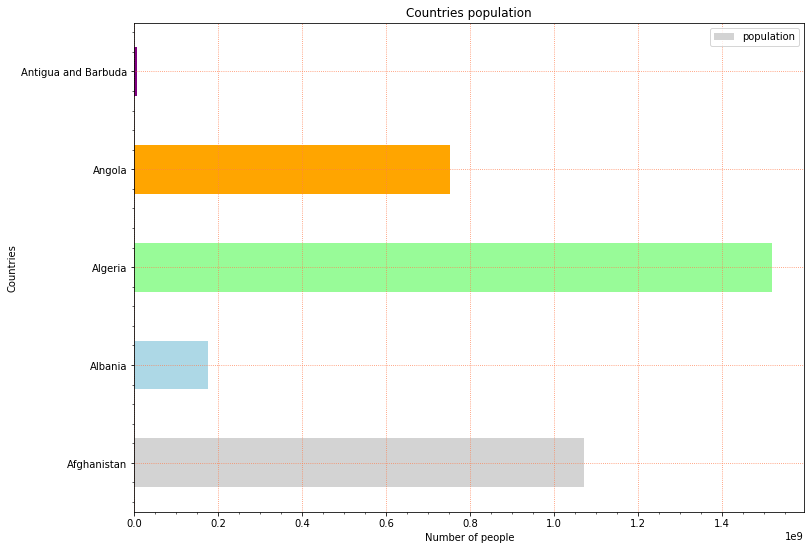

In [58]:
country_pop.iloc[0:5,].plot(kind='barh',x='country',y='population',figsize=(12,9),title="Countries population",color=country_pop.iloc[0:5,]['colors'])
plt.minorticks_on()
plt.ylabel('Countries')
plt.xlabel('Number of people')
plt.grid(which='major',color='coral',linestyle=':')

#### **CASE-2 : Using color map**

In [59]:
len(country_pop['country'].unique())

182

In [60]:
colors = np.random.random(len(country_pop['country'].unique()))

In [61]:
type(colors[0])

numpy.float64

In [62]:
len(colors)

182

In [63]:
colors

array([9.94484304e-01, 9.42653448e-01, 8.40613735e-01, 4.89930161e-02,
       7.00788796e-01, 2.31938511e-01, 6.29449207e-01, 4.59582611e-01,
       2.16063714e-01, 3.80701402e-01, 5.52827300e-01, 6.51520213e-01,
       1.34544679e-01, 9.97618437e-01, 3.51161162e-01, 1.35409771e-01,
       7.51007038e-01, 9.28928243e-01, 8.72996781e-01, 3.75471457e-02,
       4.62333755e-01, 2.47350418e-01, 5.81467801e-02, 8.55482369e-01,
       6.50518884e-01, 7.28679373e-01, 8.13912390e-02, 2.32131776e-01,
       4.38132971e-01, 8.45944174e-02, 9.23719864e-01, 5.33712754e-01,
       7.02937376e-01, 6.41232590e-01, 8.53743487e-01, 9.08783753e-01,
       1.72687594e-01, 2.85624920e-01, 2.98485847e-01, 2.17484702e-01,
       2.42030428e-02, 6.36368885e-01, 2.40585058e-01, 8.34061101e-01,
       7.16727670e-01, 2.58666902e-01, 5.22079592e-01, 6.44135993e-01,
       9.73717162e-01, 2.01278472e-02, 5.54597364e-01, 3.05671886e-01,
       6.63153030e-02, 7.07184909e-01, 9.37145927e-01, 2.84239898e-01,
      

In [64]:
colors = cm.viridis(colors)

In [65]:
type(colors)

numpy.ndarray

In [66]:
colors.shape

(182, 4)

In [67]:
colors

array([[0.983868, 0.904867, 0.136897, 1.      ],
       [0.85581 , 0.888601, 0.097452, 1.      ],
       [0.585678, 0.846661, 0.249897, 1.      ],
       [0.280267, 0.073417, 0.397163, 1.      ],
       [0.266941, 0.748751, 0.440573, 1.      ],
       [0.239346, 0.300855, 0.540844, 1.      ],
       [0.162016, 0.687316, 0.499129, 1.      ],
       [0.141935, 0.526453, 0.555991, 1.      ],
       [0.246811, 0.283237, 0.535941, 1.      ],
       [0.171176, 0.45253 , 0.557965, 1.      ],
       [0.119483, 0.614817, 0.537692, 1.      ],
       [0.185783, 0.704891, 0.485273, 1.      ],
       [0.277134, 0.185228, 0.489898, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.183898, 0.422383, 0.556944, 1.      ],
       [0.277134, 0.185228, 0.489898, 1.      ],
       [0.369214, 0.788888, 0.382914, 1.      ],
       [0.814576, 0.883393, 0.110347, 1.      ],
       [0.668054, 0.861999, 0.196293, 1.      ],
       [0.277941, 0.056324, 0.381191, 1.      ],
       [0.140536, 0.

#### **CASE-2.1: Horizontal Bar Plot**

Text(0, 0.5, 'Countries')

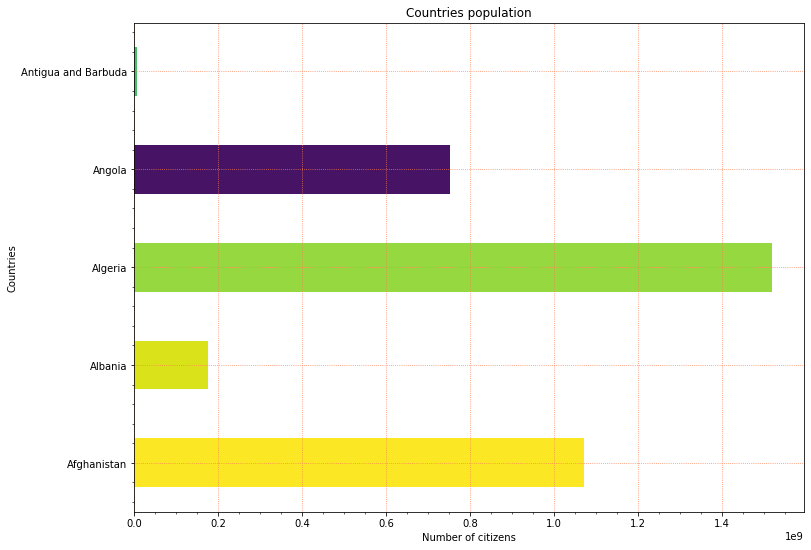

In [68]:
country_pop.iloc[0:5,].plot(kind='barh',x='country',y='population',figsize=(12,9),color=colors[0:5],title='Countries population',legend=False)
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Number of citizens')
plt.ylabel('Countries')

#### **CASE-2.2: Vertical Bar Plot**

Text(0, 0.5, 'Countries')

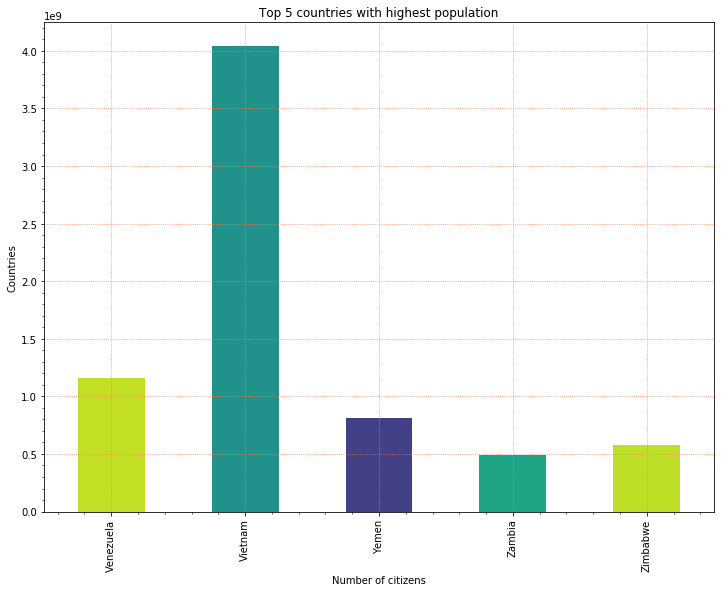

In [69]:
country_pop.iloc[-5:,].plot(kind='bar',x='country',y='population',figsize=(12,9),color=colors[-5:],title='Top 5 countries with highest population',legend=False)
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('Number of citizens')
plt.ylabel('Countries')

## **Problem-2: How to plot the Scatter Plot displaying the Total Number of Babies against Total GDP for the regions?**

In [70]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [71]:
gapminder['region'].unique()

array(['Asia', 'Europe', 'Africa', 'America'], dtype=object)

In [72]:
babies_vs_gdp = gapminder.groupby(by='region',axis=0)[['babies_per_woman','gdp_per_capita']].sum()

In [73]:
babies_vs_gdp

,babies_per_woman,gdp_per_capita
region,,
Africa,25929.75,13268509.0
America,11735.12,21474565.0
Asia,21046.64,45909938.0
Europe,9733.26,52014454.0


In [74]:
babies_vs_gdp.reset_index(inplace=True)

In [75]:
babies_vs_gdp

,region,babies_per_woman,gdp_per_capita
0,Africa,25929.75,13268509.0
1,America,11735.12,21474565.0
2,Asia,21046.64,45909938.0
3,Europe,9733.26,52014454.0


Text(0, 0.5, 'Total Gross Domestic Product')

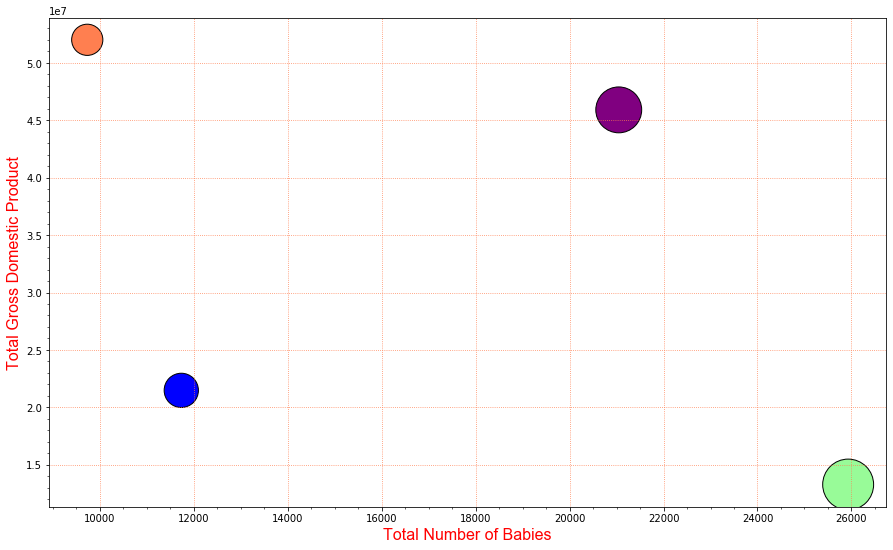

In [76]:
region_color = babies_vs_gdp['region'].map({'Africa':'palegreen','America':'blue','Asia':'purple','Europe':'coral'})
babies_count_size = babies_vs_gdp['babies_per_woman']*(1e-1)
scatter_label_font = {'family':'arial','color':'red','size':16}
babies_vs_gdp.plot(kind='scatter',x='babies_per_woman',y='gdp_per_capita',figsize=(15,9),color=region_color,linewidth=1,edgecolor='k',s=babies_count_size)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Total Number of Babies',fontdict=scatter_label_font)
plt.ylabel('Total Gross Domestic Product',fontdict=scatter_label_font)

Here, in the above example, we created the Scatter Plot displaying the **Total Number of babies** against the **Total GDP** for the continents.

## **Problem-3: How to plot the interactive Scatter Plot which will display the Total number of babies against GDP Per capital from 1950 to 2015?**

In [77]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [78]:
babies_in_region = pd.DataFrame(gapminder.groupby(['region','year'],axis=0)['babies_per_woman','gdp_per_capita'].sum())

In [79]:
babies_in_region.head()

babies_per_woman  gdp_per_capita
region year                                  
Africa 1800            338.84         33342.0
       1810            338.89         33658.0
       1820            338.90         33986.0
       1830            338.96         35369.0
       1840            339.00         36516.0

In [80]:
babies_in_region['count'] = babies_in_region.index

In [81]:
babies_in_region.head()

babies_per_woman  gdp_per_capita           count
region year                                                  
Africa 1800            338.84         33342.0  (Africa, 1800)
       1810            338.89         33658.0  (Africa, 1810)
       1820            338.90         33986.0  (Africa, 1820)
       1830            338.96         35369.0  (Africa, 1830)
       1840            339.00         36516.0  (Africa, 1840)

In [82]:
babies_in_region.reset_index(drop=True,inplace=True)

In [83]:
babies_in_region.head()

,babies_per_woman,gdp_per_capita,count
0,338.84,33342.0,"(Africa, 1800)"
1,338.89,33658.0,"(Africa, 1810)"
2,338.90,33986.0,"(Africa, 1820)"
3,338.96,35369.0,"(Africa, 1830)"
4,339.00,36516.0,"(Africa, 1840)"


In [84]:
babies_in_region['country'] = babies_in_region['count'].apply(lambda val : val[0])

In [85]:
babies_in_region['year'] = babies_in_region['count'].apply(lambda row : row[-1])

In [86]:
babies_in_region.drop(['count'],axis=1,inplace=True)

In [87]:
babies_in_region.head()

,babies_per_woman,gdp_per_capita,country,year
0,338.84,33342.0,Africa,1800
1,338.89,33658.0,Africa,1810
2,338.90,33986.0,Africa,1820
3,338.96,35369.0,Africa,1830
4,339.00,36516.0,Africa,1840


In [88]:
def interactive_scatter_plt(year):
    """
    Description: This function will create the scatter plot with user defined configurations for the graph.
    
    Input parameters: It will only accept one input parameter i.e. Year.
    
    Return: None
    """
    font_style = {'family':'serif','color':'red','size':16}
    color = babies_in_region[babies_in_region['year'] == year]['country'].map({'Africa':'lightblue', 'America':'palegreen', 'Asia':'lightpink', 'Europe':'orange'})
    size = babies_in_region[babies_in_region['year'] == year]['babies_per_woman']*(3e-0)
    babies_in_region[babies_in_region['year'] == year].plot(kind='scatter',x='babies_per_woman',y='gdp_per_capita',figsize=(15,9),edgecolor='b',linewidth=3,s=size,c=color)
    plt.minorticks_on()
    plt.grid(which='major',linestyle=':',color='coral')
    plt.axis(xmin=0,xmax=400,ymin=0,ymax=1400000)
    plt.xlabel('Number of Babies',fontdict=font_style)
    plt.ylabel('GDP Per capital',fontdict=font_style)
    plt.savefig('interactive'+str(year)+'.png')

In [89]:
interact(interactive_scatter_plt,year=widgets.IntSlider(min=1950,max=2015,value=1953))

interactive(children=(IntSlider(value=1953, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.interactive_scatter_plt(year)>

## **Problem-4: How to display the Growth in population via Line Graph?**

In [90]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [91]:
population = pd.DataFrame(gapminder.groupby('year',axis=0)['population'].sum())

In [92]:
population.reset_index(inplace=True)

In [93]:
population['population'] = round(population['population']/1000000000,2)

In [94]:
population.head()

,year,population
0,1800,0.94
1,1810,0.99
2,1820,1.04
3,1830,1.10
4,1840,1.16


Text(0.5, 1.0, 'Population growth')

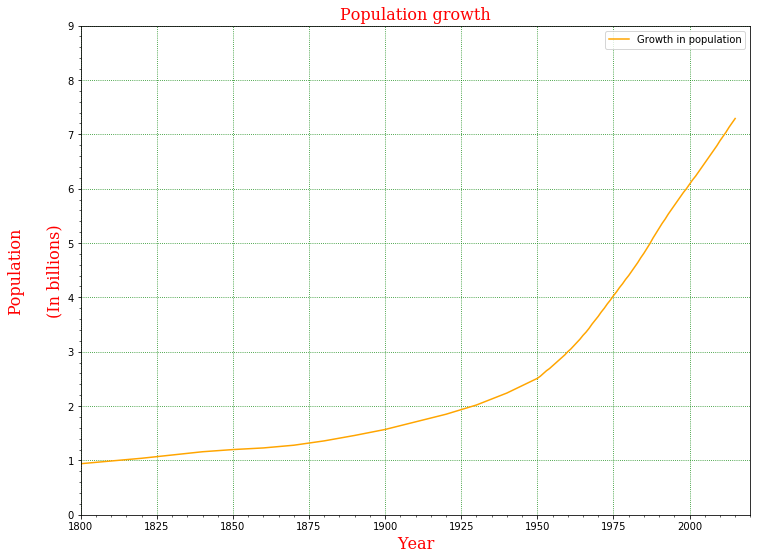

In [95]:
line_label_style = {'family':'serif','color':'red','size':16}
population.plot(kind='line',x='year',y='population',label='Growth in population',figsize=(12,9),color='orange')
plt.minorticks_on()
plt.grid(which='major',color='green',linestyle=':')
plt.axis(xmin=1800,xmax=2020,ymin=0,ymax=9)
plt.xlabel('Year',fontdict=line_label_style)
plt.ylabel('Population'+'\n'*2+'(In billions)',fontdict=line_label_style)
plt.title('Population growth',fontdict=line_label_style)

## **Problem-5: How to view the outliers in the dataset by using BOX Plots?**

In [96]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


Text(0.5, 0, 'Features from Gapminder dataset')

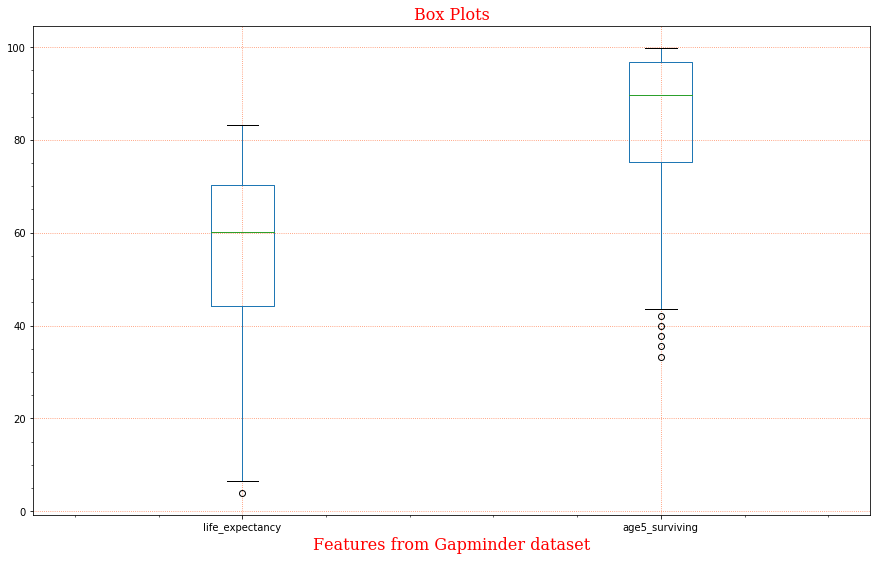

In [97]:
gapminder[['life_expectancy','age5_surviving']].plot(kind='box',figsize=(15,9))
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.title('Box Plots',fontdict=line_label_style)
plt.xlabel('Features from Gapminder dataset',fontdict=line_label_style)

## **Problem-6: How to plot the Population sharing among the continents using Pie Charts?**

In [98]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [99]:
region_population = pd.DataFrame(gapminder.groupby('region')['population'].sum())

In [100]:
region_population.reset_index(inplace=True)

In [101]:
region_population['population'] = round(region_population['population']/1000000000,2)

In [102]:
region_population

,region,population
0,Africa,39.42
1,America,44.58
2,Asia,193.93
3,Europe,54.15


In [103]:
def calc_pop_percent(val):
    total_pop = region_population['population'].sum()
    return (val/total_pop)*100

In [104]:
region_population['percentage'] = region_population['population'].apply(lambda val : calc_pop_percent(val))

In [105]:
region_population

,region,population,percentage
0,Africa,39.42,11.870634
1,America,44.58,13.424476
2,Asia,193.93,58.398579
3,Europe,54.15,16.306312


Text(0, 0.5, 'Population percentage')

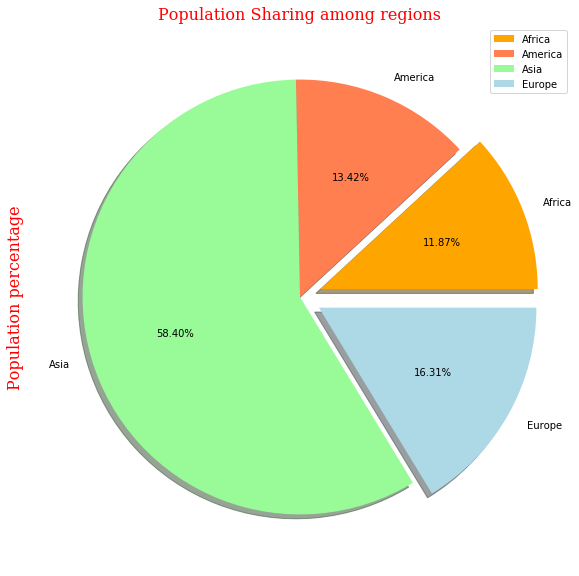

In [106]:
region_population.plot(kind='pie',y='percentage',figsize=(15,10),explode=[0.1,0,0,0.1],labels=region_population['region'],shadow=True,
                       colors=['orange','coral','palegreen','lightblue'], autopct='%1.2f%%')
plt.title('Population Sharing among regions',fontdict=line_label_style)
plt.ylabel('Population percentage',fontdict=line_label_style)

## **Problem-7: How to plot the Babies_per_woman sharing among the continents using Pie Charts?**

In [107]:
babies_in_regions = pd.DataFrame(gapminder.groupby('region')['babies_per_woman'].sum())

In [108]:
babies_in_regions.reset_index(inplace=True)

In [109]:
babies_in_regions.head()

,region,babies_per_woman
0,Africa,25929.75
1,America,11735.12
2,Asia,21046.64
3,Europe,9733.26


In [110]:
def cal_babies_pop_percentage(val):
    return (val/(babies_in_regions['babies_per_woman'].sum()))*100

In [111]:
babies_in_regions['babies_percentage'] = babies_in_regions['babies_per_woman'].apply(lambda val : cal_babies_pop_percentage(val))

In [112]:
babies_in_regions.head()

,region,babies_per_woman,babies_percentage
0,Africa,25929.75,37.884195
1,America,11735.12,17.145386
2,Asia,21046.64,30.749815
3,Europe,9733.26,14.220604


Text(0, 0.5, 'Babies percentage')

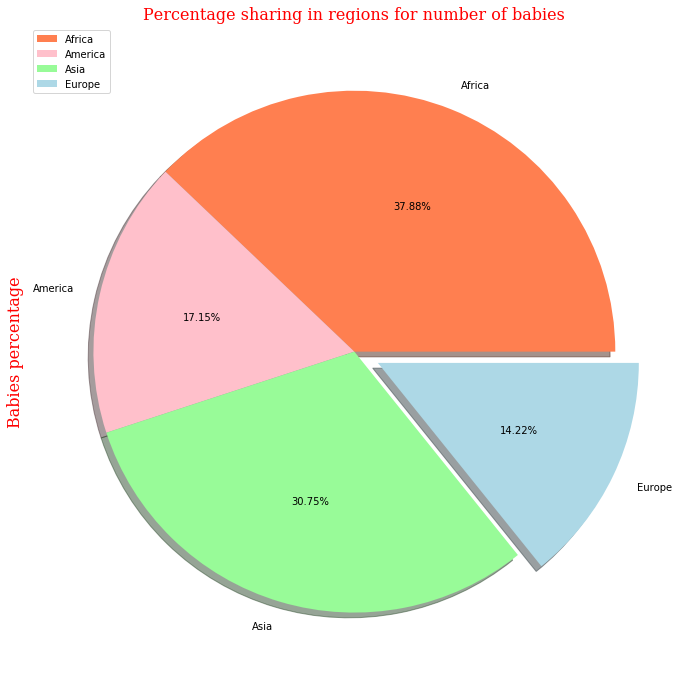

In [113]:
babies_in_regions.plot(kind='pie',y='babies_percentage',explode=[0,0,0,0.1],figsize=(15,12),autopct='%1.2f%%',shadow=True,legend=True,
                       colors=['coral','pink','palegreen','lightblue'],labels=babies_in_regions['region'])
plt.title('Percentage sharing in regions for number of babies',fontdict=line_label_style)
plt.ylabel('Babies percentage',fontdict=line_label_style)

## **PAIR Plots**

In [114]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


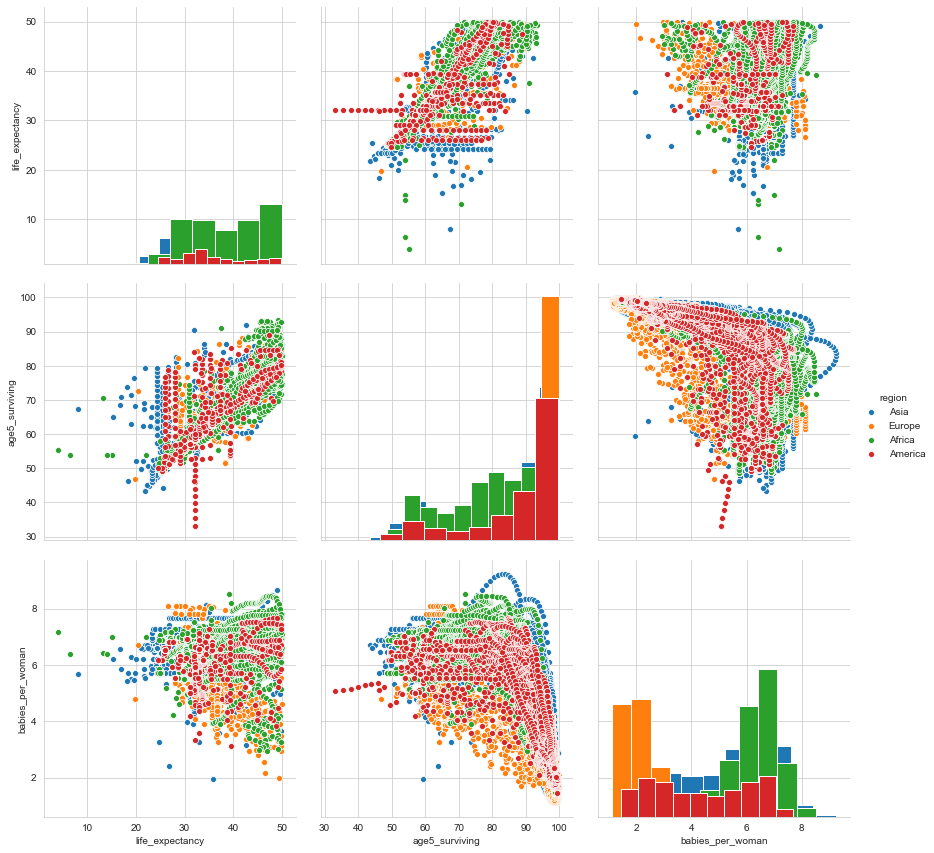

In [189]:
sns.set_style('whitegrid')
sns.pairplot(gapminder[['life_expectancy','age5_surviving','babies_per_woman','region']],hue='region',height=4,diag_kind='hist')

## **HISTOGRAM Plots**

In [116]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


Text(0, 0.5, 'Frequency')

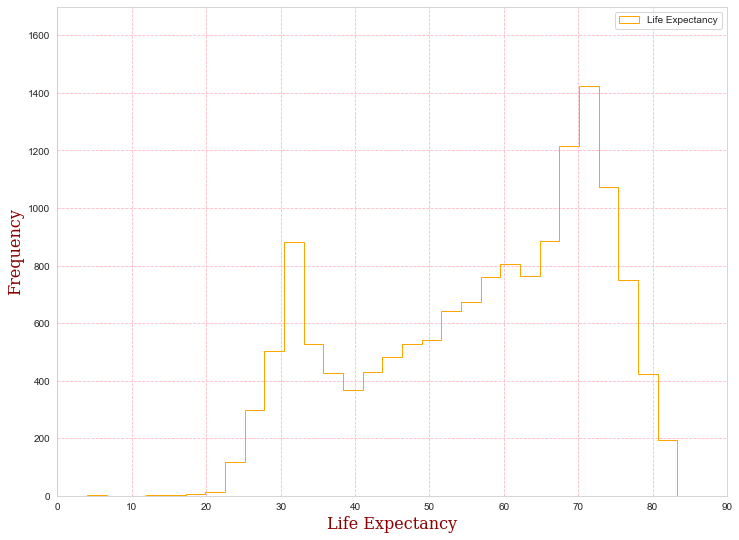

In [117]:
bar_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16}

gapminder['life_expectancy'].plot(kind='hist',bins=30,histtype='step',figsize=(12,9),color='orange',legend=True,label='Life Expectancy')
plt.minorticks_on()
plt.grid(which='major',linestyle='--',color='lightpink')
plt.axis(xmin=0,xmax=90,ymin=0,ymax=1700)
plt.xlabel('Life Expectancy',fontdict=bar_font)
plt.ylabel('Frequency',fontdict=bar_font)

In [118]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


Text(0, 0.5, 'Frequency')

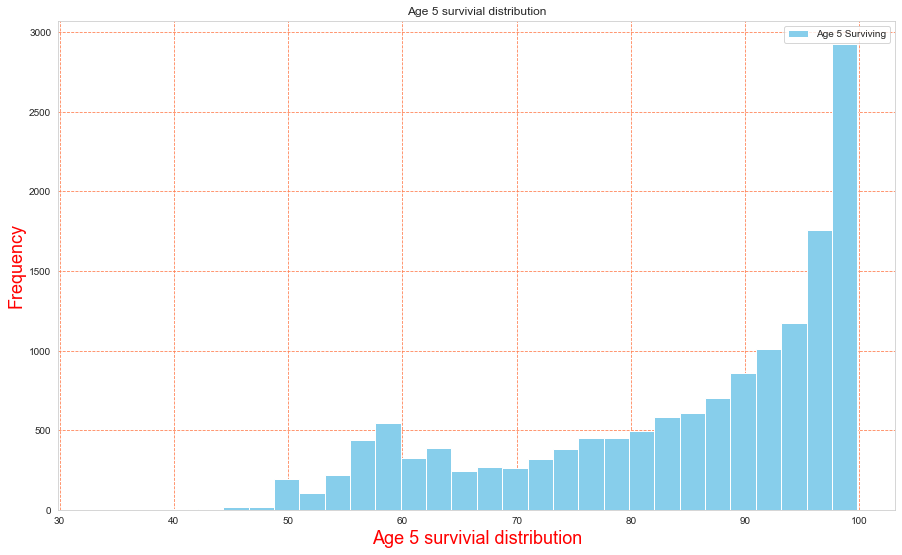

In [119]:
block_bar_font = {'family': 'arial',
        'color':  'red',
        'weight': 'normal',
        'size': 18}

gapminder['age5_surviving'].plot(kind='hist',bins=30,figsize=(15,9),legend=True,label='Age 5 Surviving',color='skyblue')
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle='--')
plt.title('Age 5 survivial distribution')
plt.xlabel('Age 5 survivial distribution',fontdict=block_bar_font)
plt.ylabel('Frequency',fontdict=block_bar_font)

## **Density Plots**

Text(0.5, 1.0, 'Life Expectancy Distribution and Density Function')

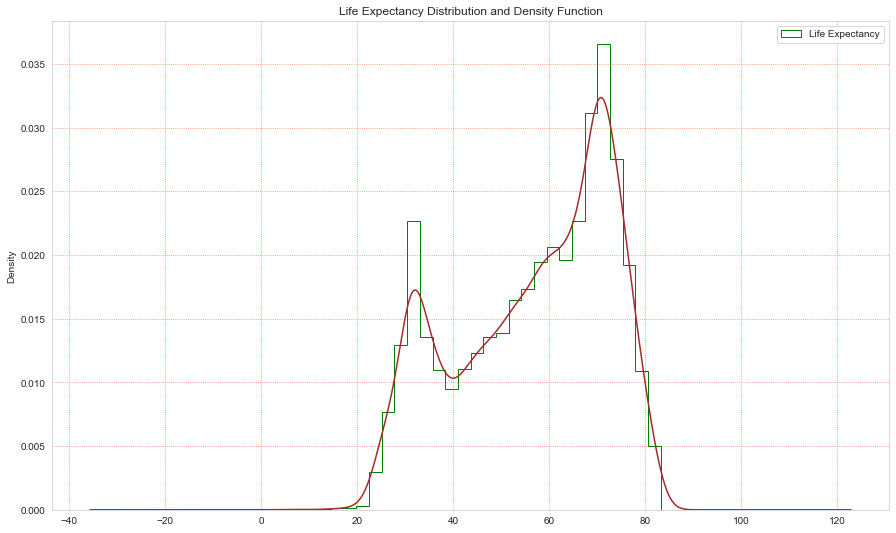

In [120]:
gapminder['life_expectancy'].plot(kind='hist',bins=30,histtype='step',density=True,color='green',figsize=(15,9),legend=True,label='Life Expectancy')
gapminder['life_expectancy'].plot(kind='density',color='brown')
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.title('Life Expectancy Distribution and Density Function')

In [121]:
def data_distributions(col_name):
    gapminder[col_name].plot(kind='hist',bins=30,density=True,legend=True,label=col_name,color='palegreen',figsize=(15,9))
    gapminder[col_name].plot(kind='kde',color='brown')
    plt.minorticks_on()
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.title('Distribution of '+col_name)
    plt.show()

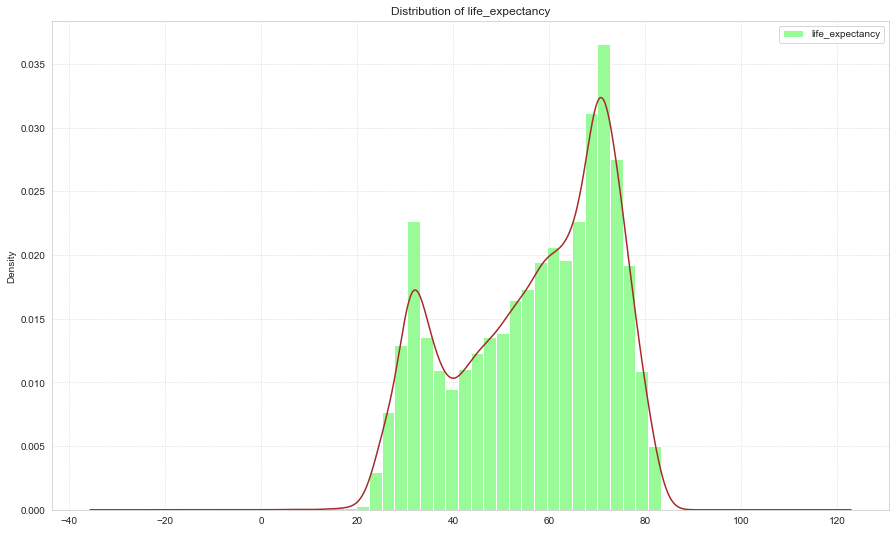

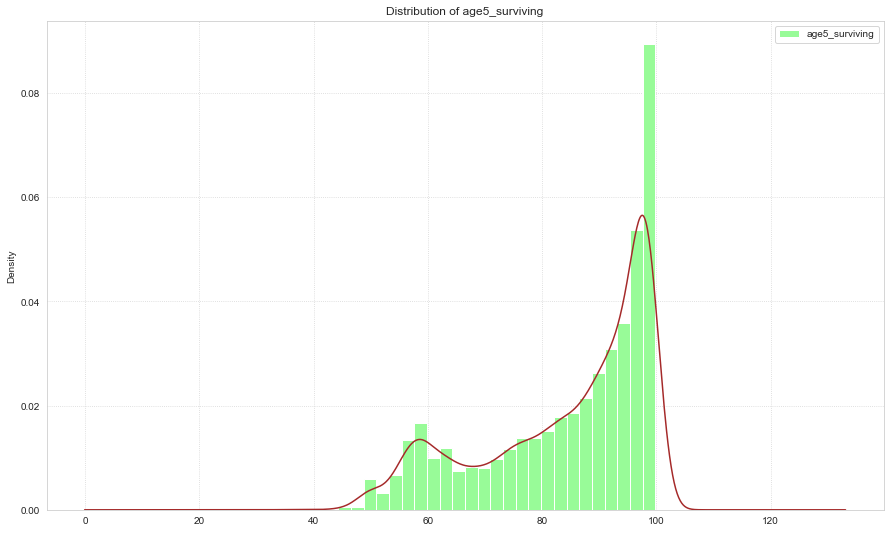

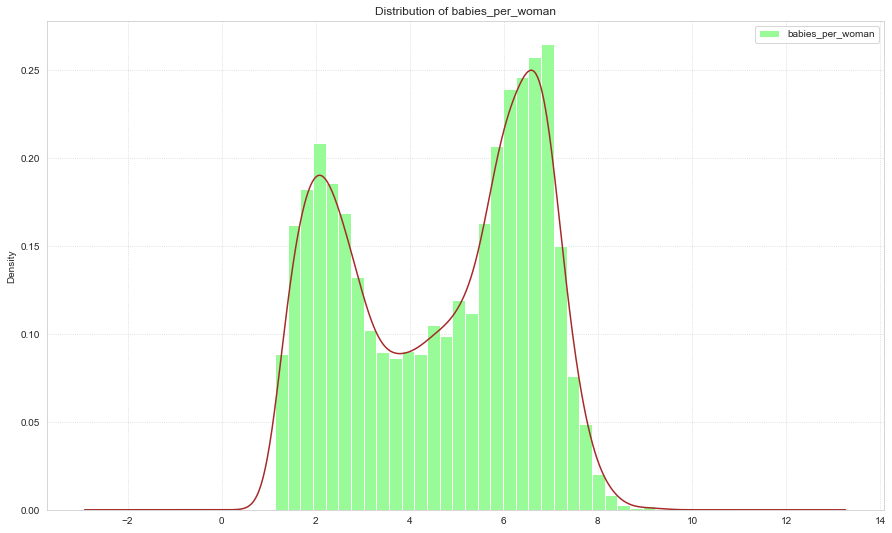

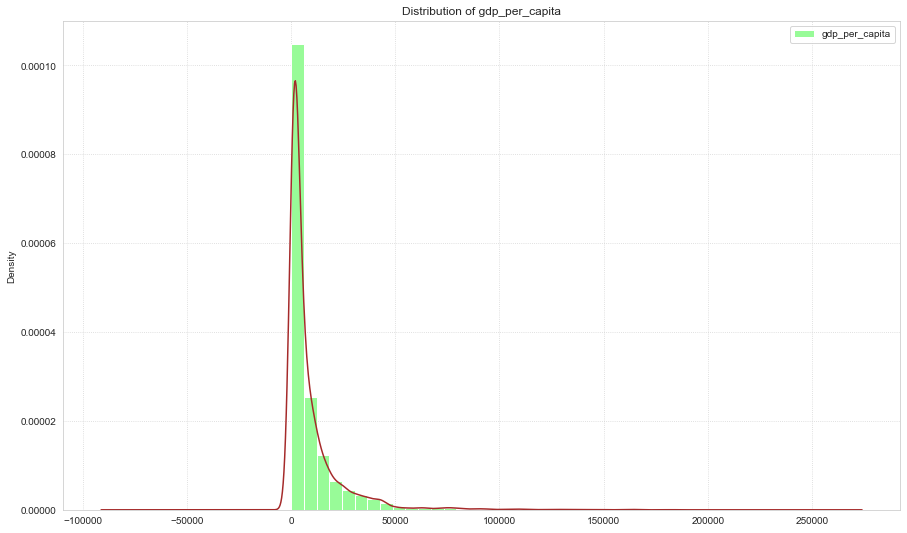

In [122]:
for column in ['life_expectancy','age5_surviving','babies_per_woman','gdp_per_capita']:
    data_distributions(column)

## **HEATMAPS**

In [123]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


(4.0, 0.0)

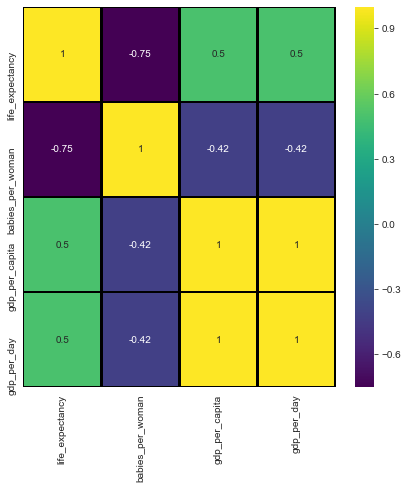

In [155]:
plt.figure(figsize=(7,7))
fig = sns.heatmap(gapminder[['life_expectancy','babies_per_woman','gdp_per_capita','gdp_per_day']].corr(), annot=True, linewidths=1.5, linecolor='k',cmap='viridis')
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)

In [142]:
gapminder[['life_expectancy','babies_per_woman','gdp_per_capita','gdp_per_day']].corr()

,life_expectancy,babies_per_woman,gdp_per_capita,gdp_per_day
life_expectancy,1.000000,-0.752118,0.500292,0.500292
babies_per_woman,-0.752118,1.000000,-0.422305,-0.422305
gdp_per_capita,0.500292,-0.422305,1.000000,1.000000
gdp_per_day,0.500292,-0.422305,1.000000,1.000000


In [164]:
gapminder['life_expectancy'] = gapminder['life_expectancy'].apply(lambda val: None if val > 50 else val)  

In [178]:
gapminder.isnull().sum()

country                0
year                   0
region                 0
population             0
life_expectancy     9929
age5_surviving         0
babies_per_woman       0
gdp_per_capita         0
gdp_per_day            0
dtype: int64

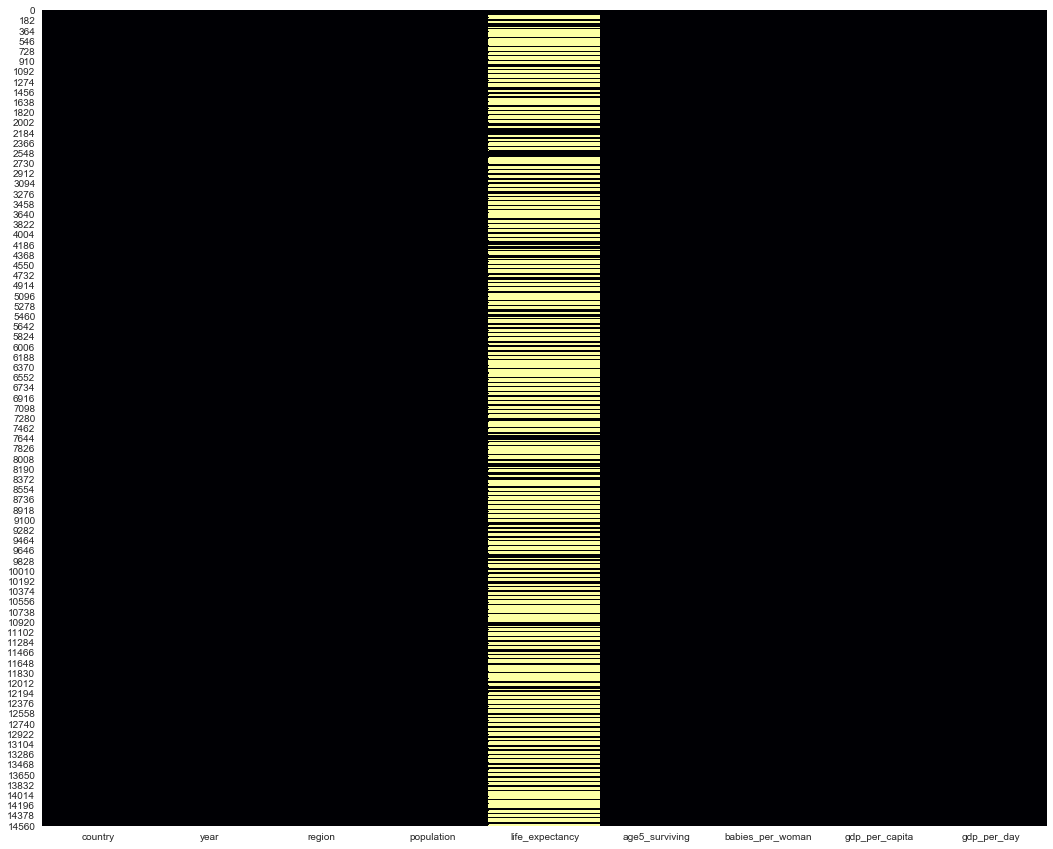

In [174]:
plt.figure(figsize=(18,15))
sns.heatmap(gapminder.isnull(),cmap='inferno',cbar=False)

In [127]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [204]:
def plot_data(year):
    data = gapminder[gapminder['year'] == year].sort_values('population',ascending=False)
    area = 5e-6 * data['population']
    color = data['age5_surviving']
    
    edgecolor = data['region'].map({'Africa': 'palegreen', 'Asia': 'coral', 'America': 'lightblue', 'Europe': 'pink'})
    
    data.plot(kind='scatter',x='gdp_per_day',y='life_expectancy',s=area,c=color,sharex=False,
              linewidths=1,edgecolor=edgecolor,figsize=(15,9),colormap=matplotlib.cm.get_cmap('winter'))
    plt.minorticks_on()
    plt.grid(which='major',linestyle=':',color='lightgray')
    
    for level in [4,16,64]:
        plt.axvline(level,color='brown',linestyle='--')
    
    plt.axis(xmin=-10,xmax=160,ymin=30,ymax=100)

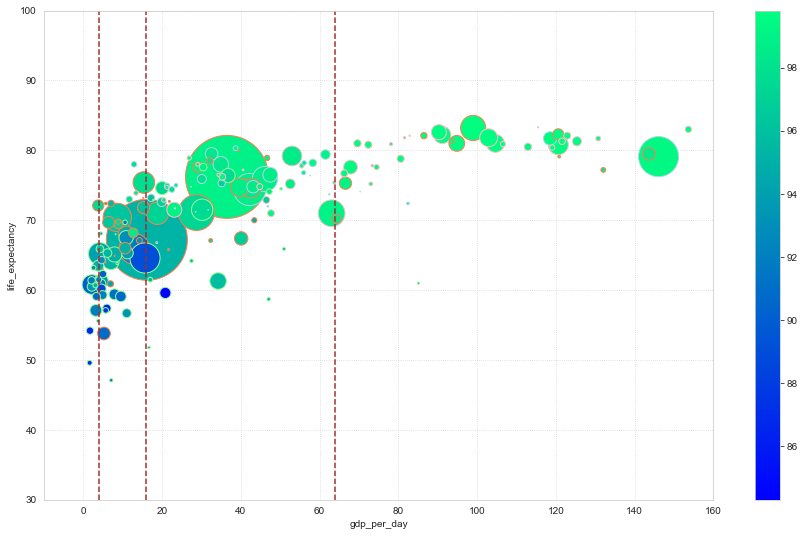

In [205]:
plot_data(2015)

In [129]:
want_error

NameError: name 'want_error' is not defined

## **CONCAT**

In [ ]:
babies_in_region.head()

In [ ]:
babies_in_regions.head()

In [ ]:
pd.concat([babies_in_region,babies_in_regions],axis=1).head()

In [ ]:
gapminder.head()

In [ ]:
region_count = pd.DataFrame(gapminder['region'].value_counts())

In [ ]:
region_count.reset_index(inplace=True)

In [ ]:
region_count.columns = ['name','count']

In [ ]:
region_count

In [ ]:
region_count['color'] = region_count['name'].map({'Africa':'palegreen','Asia':'coral','Europe':'lightblue','America':'pink'})

In [ ]:
region_count

In [ ]:
region_count.plot(kind='barh',x='name',y='count',figsize=(15,9),color=region_count['color'],legend=False,sharex=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.axis(xmin=0,xmax=4500)

## **ASTYPE**

In [ ]:
gapminder.head()

In [ ]:
gapminder['life_expectancy'] = gapminder['life_expectancy'].astype(int)

In [ ]:
gapminder.head()

## **MERGE**

#### **DF1**

In [ ]:
gapminder['ID'] = gapminder.index

In [ ]:
gapminder.drop(['life_expectancy','gdp_per_day'],axis=1,inplace=True)
gapminder.head()

#### **DF2**

In [ ]:
gapminder2 = pd.DataFrame({'ID': [0,1,2,3], 'VAL': ['Rajesh','Nitin','Sahil','Sameer']})

In [ ]:
gapminder2.head()

In [ ]:
pd.merge(gapminder,gapminder2,how='inner',on='ID')

## **DATA PREPROCESSING**

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
print(cancer.DESCR)

In [ ]:
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
tgt_df = pd.DataFrame(cancer.target,columns=['target'])

In [ ]:
cancer_df.head()

In [ ]:
tgt_df.head()

In [ ]:
cancer_df = pd.concat([cancer_df,tgt_df],axis=1)

In [ ]:
cancer_df.head()

In [ ]:
cancer_df.isnull().sum()

In [ ]:
def plot_distribution(col_name):
    cancer_df[col_name].plot(kind='hist',bins=20,figsize=(12,9),color='orange',density=True)
    cancer_df[col_name].plot(kind='kde',color='black')
    plt.xlabel(col_name)
    plt.minorticks_on()
    plt.grid(which='major',color='coral',linestyle=':')
    plt.title('Distribution of '+col_name)
    plt.show()

In [ ]:
for col in cancer_df.columns:
    plot_distribution(col)

In [ ]:
def box_plots(col_name):
    cancer_df[col_name].plot(kind='box',figsize=(7,7),color='coral',vert=False)
    plt.minorticks_on()
    plt.grid(which='major',color='coral',linestyle=':')
    plt.show()

In [ ]:
cancer_df.plot(kind='box',figsize=(50,35),color='coral',vert=False)

In [ ]:
for col in cancer_df.columns:
    box_plots(col)

In [ ]:
def fix_fliers(col_name):
    pd.DataFrame(cancer_df[col_name].apply(lambda val : np.log10(val))).plot(kind='box',figsize=(9,9),color='coral',vert=False)
    plt.grid(which='major',linestyle=':',color='lightgray')
    plt.show()

In [ ]:
for col in cancer_df.columns:
    fix_fliers(col)

In [ ]:
%debug